## Part 1. Human Rights Index

In [106]:
data = pd.read_csv('/Users/victoria/Project-Week6-HumanRights/qog_bas_cs_jan20.csv')
data

,ccode,cname,ccodealp,ccodecow,ccodewb,version,ajr_settmort,atop_ally,atop_number,bci_bci,...,wvs_imprel,wvs_pmi12,wvs_psarmy,wvs_psdem,wvs_psexp,wvs_pssl,wvs_relacc,wvs_satfin,wvs_subh,wvs_trust
0,4,Afghanistan,AFG,700.0,4.0,QoGBasCSJan20,4.540098,1.0,1.0,63.563793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,ALB,339.0,8.0,QoGBasCSJan20,NaN,1.0,7.0,53.086830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Algeria,DZA,615.0,12.0,QoGBasCSJan20,4.359270,1.0,6.0,55.648403,...,3.881811,1.976494,1.836735,3.446242,2.183652,1.841885,3.710616,5.988125,3.805579,0.179286
3,20,Andorra,AND,232.0,20.0,QoGBasCSJan20,NaN,1.0,2.0,19.976542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Angola,AGO,540.0,24.0,QoGBasCSJan20,5.634790,1.0,8.0,70.689346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,860,Uzbekistan,UZB,704.0,860.0,QoGBasCSJan20,NaN,1.0,29.0,53.420490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,862,Venezuela,VEN,101.0,862.0,QoGBasCSJan20,4.357990,1.0,2.0,73.522057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,882,Samoa,WSM,990.0,882.0,QoGBasCSJan20,NaN,1.0,1.0,36.221863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,887,Yemen,YEM,679.0,887.0,QoGBasCSJan20,NaN,1.0,3.0,71.053528,...,3.939880,1.141649,1.833906,3.386161,3.000000,2.027414,3.598178,4.671357,3.892000,0.403987


In [101]:
human_rights = data[['cname', 'ffp_hr']]

In [110]:
human_rights[(human_rights['ffp_hr'])==1]

,cname,ffp_hr
58,Finland,1.0
75,Iceland,1.0
101,Luxembourg,1.0
121,Netherlands,1.0
123,New Zealand,1.0


In [124]:
human_rights[(human_rights['ffp_hr'])>9.65]

,cname,ffp_hr
32,Central African Republic,9.7
41,"Congo, Democratic Republic",9.8
169,Syria,9.8
183,Egypt,9.8
192,Yemen,9.7


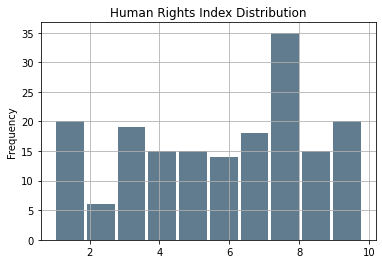

In [145]:
human_rights['ffp_hr'].plot.hist(grid=True, rwidth=0.9, color='#607c8e');
plt.title('Human Rights Index Distribution');

In [148]:
human_rights[(human_rights['ffp_hr'].isnull()==True)].shape

(17, 2)

There are 192 countries in total,
17 countries do not have values.
And the rest 175 have the following index distribution (quite even): 
20 countries with the best situation, 20 countries with the worst.
The most frequent index value is between 7 and 8, which is sad.

In [218]:
human_rights[(human_rights['ffp_hr'])>4].shape

(127, 2)

66% of all countries are far from respect for human rights.

## Part 2. Create several tables according to themes for heatmaps 

In [149]:
quality_of_government = data[['cname', 'ffp_hr', 'bci_bci', 'bti_muf', 'bti_pdi', 'cspf_sfi', 'ffp_ps', 'ffp_sl', 'fh_fog', 'fh_pr', 'gcb_br', 'iiag_rol', 'vdem_corr', 'wbgi_gee']]

In [157]:
import seaborn as sns
import numpy as np

<AxesSubplot:>

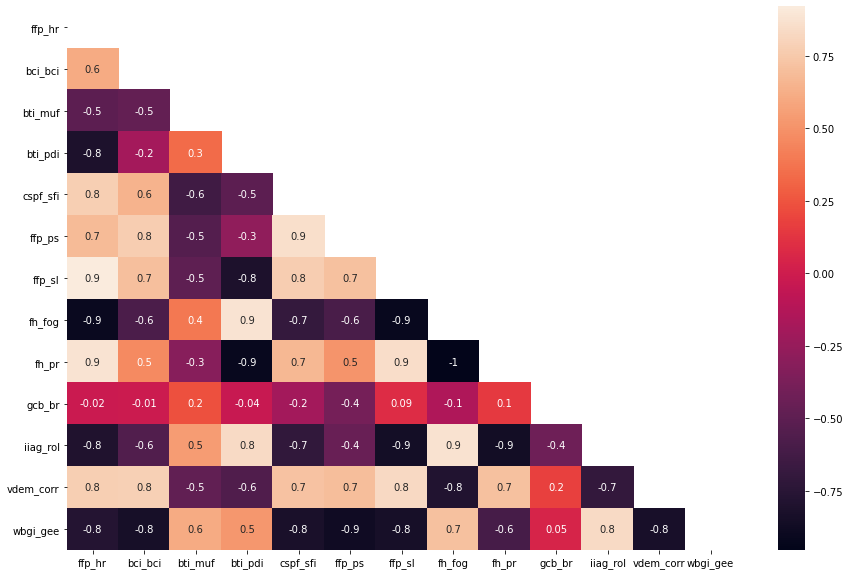

In [243]:
plt.figure(figsize=(15,10))
matrix = np.triu(quality_of_government.corr())
sns.heatmap(quality_of_government.corr(), annot=True, mask=matrix, fmt='.1g')

ffp_hr (Human Rights) highly correlates with:\
bti_pdi (Performance of Democratic Institutions) -0.81\
cspf_sfi (State Fragility Index) 0.78\
ffp_sl (State Legitimacy) 0.92\
fh_fog (Functioning of Government) -0.91\
fh_pr  (Political Rights) 0.88     (1-most free, 7-least free)\
iiag_rol (Rule of Law) -0.8\
vdem_corr (Political Corruption Index) 0.78\
wbgi_gee (Government Effectiveness) -0.77

In [161]:
society = data[['cname', 'ffp_hr', 'bti_ci', 'bti_eo', 'bti_pp', 'bti_seb', 'ess_trpeople', 'gpi_gpi', 'pwt_pop', 'vdem_gender', 'wdi_lifexp', 'wdi_popden', 'wdi_popurb' ]]

<AxesSubplot:>

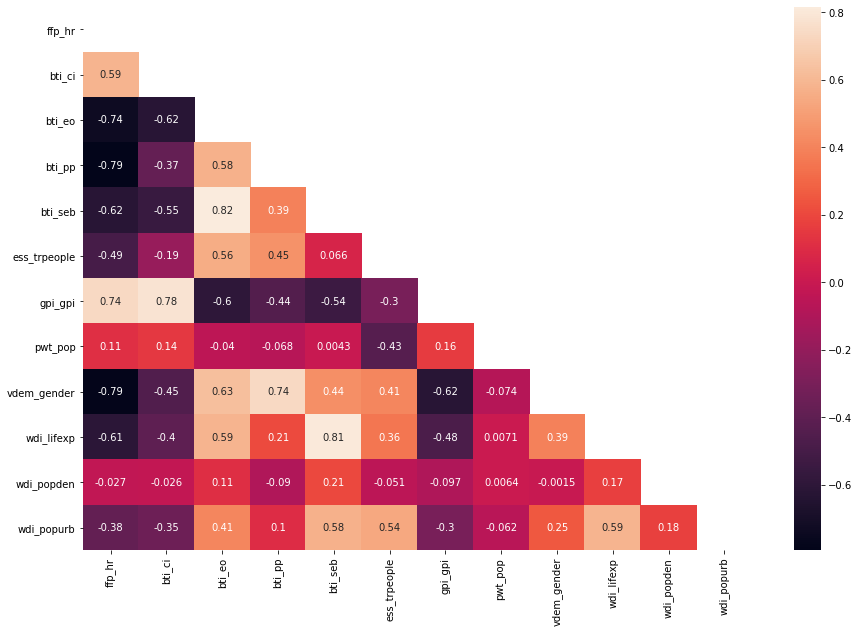

In [162]:
plt.figure(figsize=(15,10))
matrix = np.triu(society.corr())
sns.heatmap(society.corr(), annot=True, mask=matrix)

ffp_hr (Human Rights) more than with other correlates with:\
bti_eo (Equal Opportunity) -0.74\
bti_pp (Political Participation) -0.79\
gpi_gpi (Global Peace Index) 0.74\
vdem_gender (Women political empowerment index) -0.79

In [163]:
military = data[['cname', 'ffp_hr', 'atop_ally', 'bicc_gmi', 'ffp_ext', 'gd_ptsa', 'iiag_ns', 'nelda_rpae', 'voh_gti', 'wbgi_pve', 'wdi_afp', 'wdi_expmil', 'wdi_peacekeep', 'wvs_psarmy']]

<AxesSubplot:>

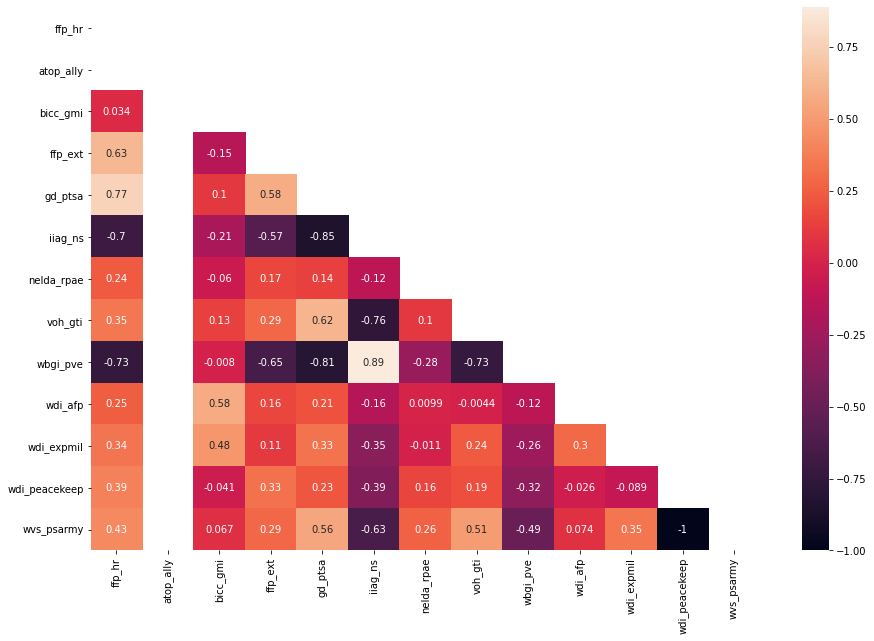

In [164]:
plt.figure(figsize=(15,10))
matrix = np.triu(military.corr())
sns.heatmap(military.corr(), annot=True, mask=matrix)

Strangely strong correlation with wbgi_pve (Political Stability and Absence of Terrorism) -0.73. Investigate!\
0.77 gd_ptsa (Political Terror Scale - Amnesty International)\
-0.7 iiag_ns (National Security)

In [167]:
education = data[['cname', 'ffp_hr', 'ffp_hf', 'iiag_edu', 'iiag_hd', 'wdi_expedu']]

<AxesSubplot:>

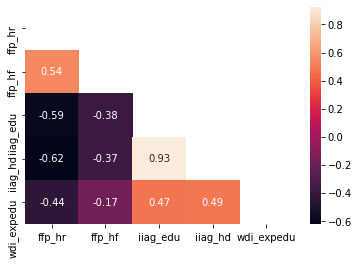

In [171]:
matrix = np.triu(education.corr())
sns.heatmap(education.corr(), annot=True, mask=matrix)

No strong correlation with education!

In [172]:
infrastructure = data[['cname', 'ffp_hr', 'iiag_inf', 'ross_gas_value_2014', 'ross_oil_value_2014', 'wdi_acel', 'wdi_ane', 'wdi_eneimp', 'wdi_internet', 'who_sanittot']]

<AxesSubplot:>

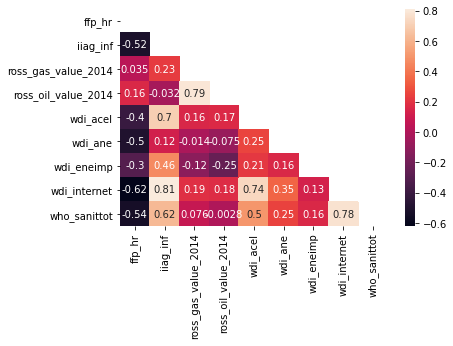

In [173]:
matrix = np.triu(infrastructure.corr())
sns.heatmap(infrastructure.corr(), annot=True, mask=matrix)

Again nothing interesting and strong

In [180]:
environment = data[['cname', 'ffp_hr', 'bti_su', 'epi_eh', 'epi_epi', 'ht_region', 'lp_lat_abst', 'wdi_araland', 'wdi_area', 'wdi_fossil', 'wel_cwi']]

<AxesSubplot:>

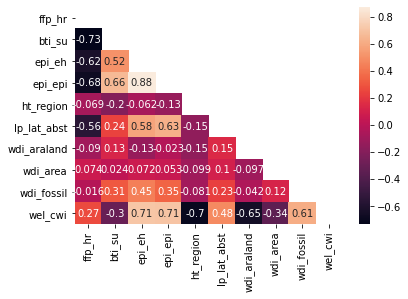

In [181]:
matrix = np.triu(environment.corr())
sns.heatmap(environment.corr(), annot=True, mask=matrix)

Only bti_su (Sustainability) -0.73, not so strong

In [182]:
gender = data[['cname', 'ffp_hr', 'bti_eo', 'ipu_l_sw', 'ipu_u_sw', 'wdi_unempfilo']]

<AxesSubplot:>

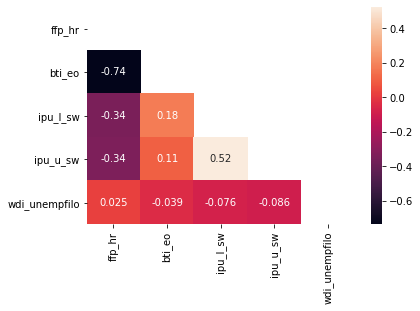

In [183]:
matrix = np.triu(gender.corr())
sns.heatmap(gender.corr(), annot=True, mask=matrix)

The less human rights are violated the more equality of opportunity is archived. bti_eo (Equal Opportunity) -0.74

In [185]:
health = data[['cname', 'ffp_hr', 'ess_happy', 'ess_health', 'iiag_he', 'sgi_sohe', 'undp_hdi', 'wvs_hap', 'wvs_subh']]

<AxesSubplot:>

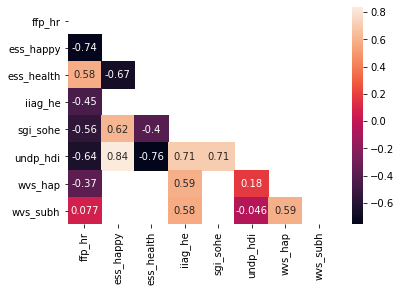

In [186]:
matrix = np.triu(health.corr())
sns.heatmap(health.corr(), annot=True, mask=matrix)

ess_happy (Subjective Happiness) -0.74

In [188]:
history = data[['cname', 'ffp_hr', 'ajr_settmort', 'ht_colonial', 'lp_legor']]

<AxesSubplot:>

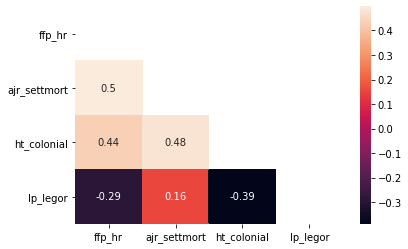

In [189]:
matrix = np.triu(history.corr())
sns.heatmap(history.corr(), annot=True, mask=matrix)

In [212]:
judical = data[['cname', 'ffp_hr', 'bti_aar', 'bti_cr', 'bti_foe', 'bti_ij', 'bti_rol', 'ccp_equal', 'ccp_freerel', 'ccp_slave', 'ccp_strike', 'ciri_assn', 'ciri_dommov', 'ciri_formov', 'ciri_injud', 'ciri_polpris', 'ciri_speech', 'ciri_tort', 'ess_trlegal', 'ess_trpolice', 'fh_pr', 'hf_prights', 'iiag_phr', 'iiag_srol', 'wdi_homicides', 'wvs_confjs', 'wvs_confpol']]

<AxesSubplot:>

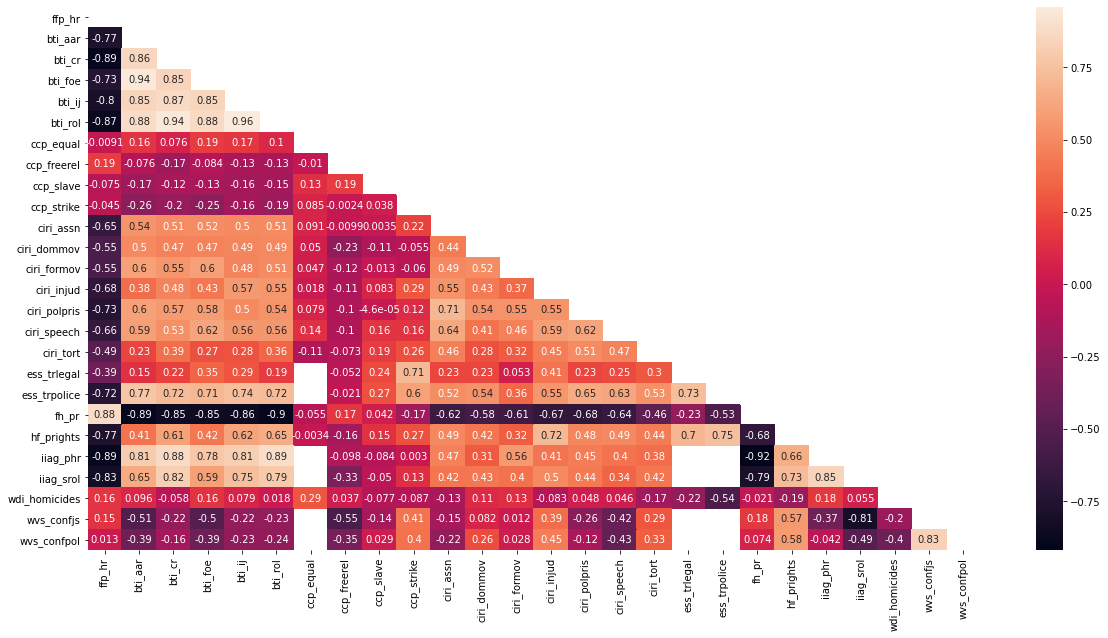

In [215]:
plt.figure(figsize=(20,10))
matrix = np.triu(judical.corr())
sns.heatmap(judical.corr(), annot=True, mask=matrix)

ffp_hr (Human Rights) highly correlates with:\
-0.77 bti_aar (Association/Assembly Rights)\
-0.89 bti_cr (Civil Rights)\
-0.73 bti_foe (Freedom of Expression)\
-0.8  bti_ij (Independent Judiciary)\
-0.87 bti_rol (Rule of Law)\
-0.73 ciri_polpris (Political Imprisonment)\
-0.72 ess_trpolice (Trust in Police)\
0.88 fh_pr (Political Rights)\
-0.77 hf_prights (Property Rights)\
-0.89 iiag_phr (Participation and Human Rights)\
-0.83 iiag_srol (Safety and Rule of Law)

In [220]:
labour = data[['cname', 'ffp_hr', 'hf_labor', 'sgi_ec', 'sgi_eclm', 'vi_udr', 'vi_wcoord', 'wdi_emp', 'wvs_conflu']]

<AxesSubplot:>

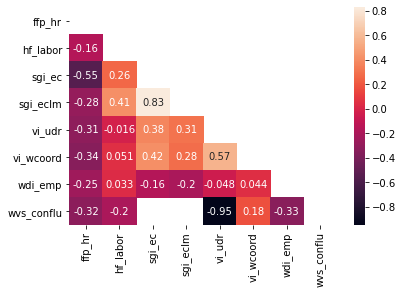

In [222]:
matrix = np.triu(labour.corr())
sns.heatmap(labour.corr(), annot=True, mask=matrix)

In [223]:
media = data[['cname', 'ffp_hr', 'bti_foe', 'fhn_fotnsc', 'fhp_score5', 'rsf_pfi', 'vdem_mecorrpt', 'wvs_confpr', 'wvs_conftv']]

<AxesSubplot:>

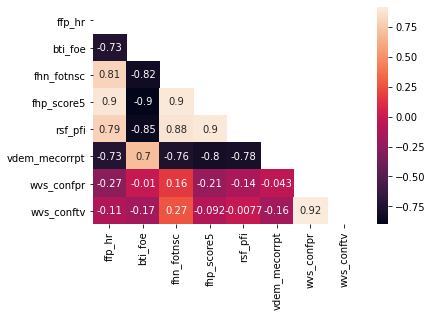

In [224]:
matrix = np.triu(media.corr())
sns.heatmap(media.corr(), annot=True, mask=matrix)

-0.73 bti_foe (Freedom of Expression)\
0.81 fhn_fotnsc (Freedom of Net:Score)\
0.9 fhp_score5 (Freedom of Press:Score)\
0.79 rsf_pfi (Press freedom Index)\
-0.73 vdem_mecorrpt (Media corrupt)

In [225]:
migration = data[['cname', 'ffp_hr', 'ffp_hf', 'ffp_ref', 'wdi_idpvp', 'wdi_imig', 'wdi_migration']]

<AxesSubplot:>

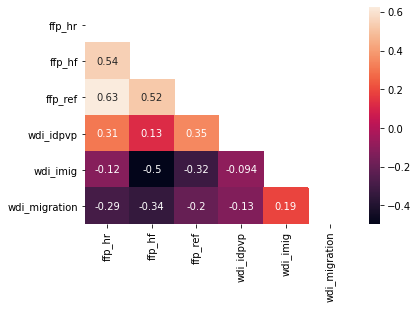

In [226]:
matrix = np.triu(migration.corr())
sns.heatmap(migration.corr(), annot=True, mask=matrix)

In [227]:
welfare = data[['cname', 'ffp_hr', 'bti_wr', 'bti_ssn', 'iiag_wel', 'wdi_spr', 'sgi_so']]

<AxesSubplot:>

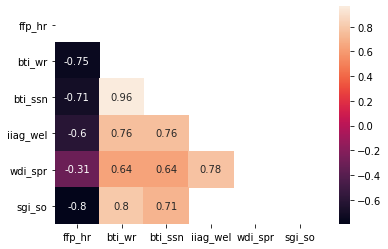

In [228]:
matrix = np.triu(welfare.corr())
sns.heatmap(welfare.corr(), annot=True, mask=matrix)

-0.75 bti_wr (Welfare Regime)\
-0.71 bti_ssn (Social Safety Nets)\
-0.8 sgi_so (Policy Performance: Social Policies - Overall)

In [229]:
religion = data[['cname', 'ffp_hr', 'ess_relig', 'wvs_confch', 'wvs_imprel', 'wvs_relacc']]

<AxesSubplot:>

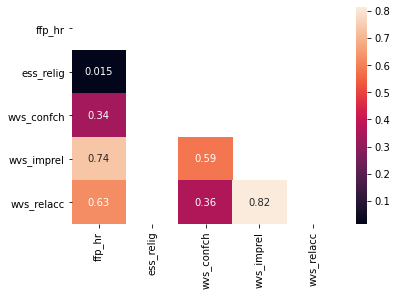

In [230]:
matrix = np.triu(religion.corr())
sns.heatmap(religion.corr(), annot=True, mask=matrix)

0.74 wvs_imprel (Important in Life: Religion). Interesting!

In [231]:
election = data[['cname', 'ffp_hr', 'bti_ffe', 'bti_ps', 'cpds_lcom', 'cpds_lcon', 'cpds_ll', 'cpds_lls', 'cpds_lp', 'cpds_lr', 'cpds_ls', 'cpds_tg', 'cpds_vt', 'ess_trpolit', 'gol_enep', 'nelda_mtop', 'nelda_oa', 'sgi_qdep', 'van_index']]

<AxesSubplot:>

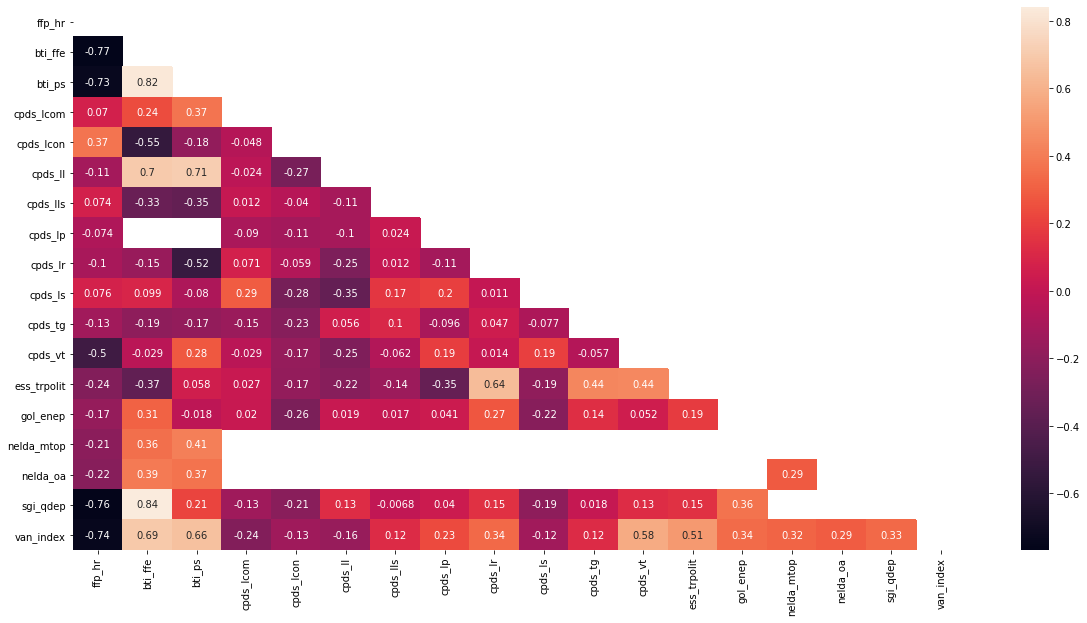

In [233]:
plt.figure(figsize=(20,10))
matrix = np.triu(election.corr())
sns.heatmap(election.corr(), annot=True, mask=matrix)

-0.77 bbi_ffe (Free and fair Elections)\
-0.73 bbi_ps (Party System)\
-0.76 sgi_qdep (Quality of Democracy: Electoral Process)\
-0.74 van_index (Index of Democratization)

In [235]:
system = data[['cname', 'ffp_hr', 'bti_aod', 'bti_cdi', 'bti_ds', 'bti_sop', 'cses_sd', 'ffp_sl', 'ht_regtype', 'ht_regtype1', 'p_durable', 'wvs_pssl']]

<AxesSubplot:>

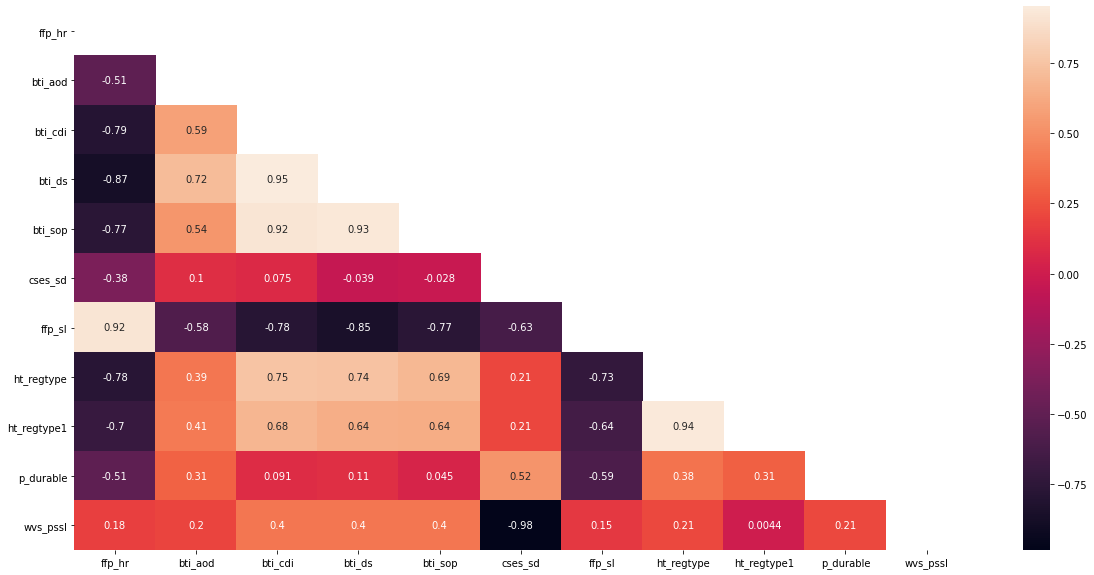

In [236]:
plt.figure(figsize=(20,10))
matrix = np.triu(system.corr())
sns.heatmap(system.corr(), annot=True, mask=matrix)

-0.79 bti_cdi (Commitment to Democratic Institutions)\
-0.87 bti_ds (Democracy Status)\
-0.77 bbi_sop (Separation of Powers)\
0.92 ffp_sl (State Legitimacy)\
-0.78 ht_regtype (Regime Type)

In [238]:
public_economy = data[['cname', 'ffp_hr', 'bti_ep', 'bti_mes', 'bti_sel', 'mad_gdppc', 'lis_gini', 'wdi_debt', 'wdi_eneimp', 'wdi_fdiin', 'wdi_trade']]

<AxesSubplot:>

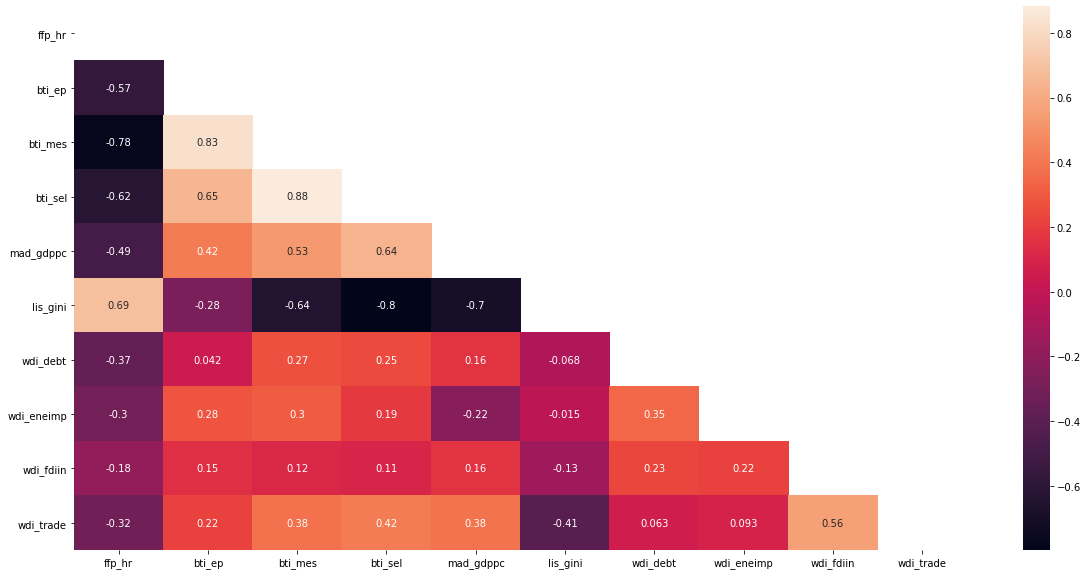

In [239]:
plt.figure(figsize=(20,10))
matrix = np.triu(public_economy.corr())
sns.heatmap(public_economy.corr(), annot=True, mask=matrix)

-0.78 bti_mes (Market Economy Status)

In [241]:
private_economy = data[['cname', 'ffp_hr', 'bti_seb', 'ffp_ued', 'fi_ftradeint', 'fi_index', 'hf_efiscore', 'hf_financ', 'iiag_be', 'ipi_tradeopen', 'wdi_firftopm', 'wvs_satfin']] 

<AxesSubplot:>

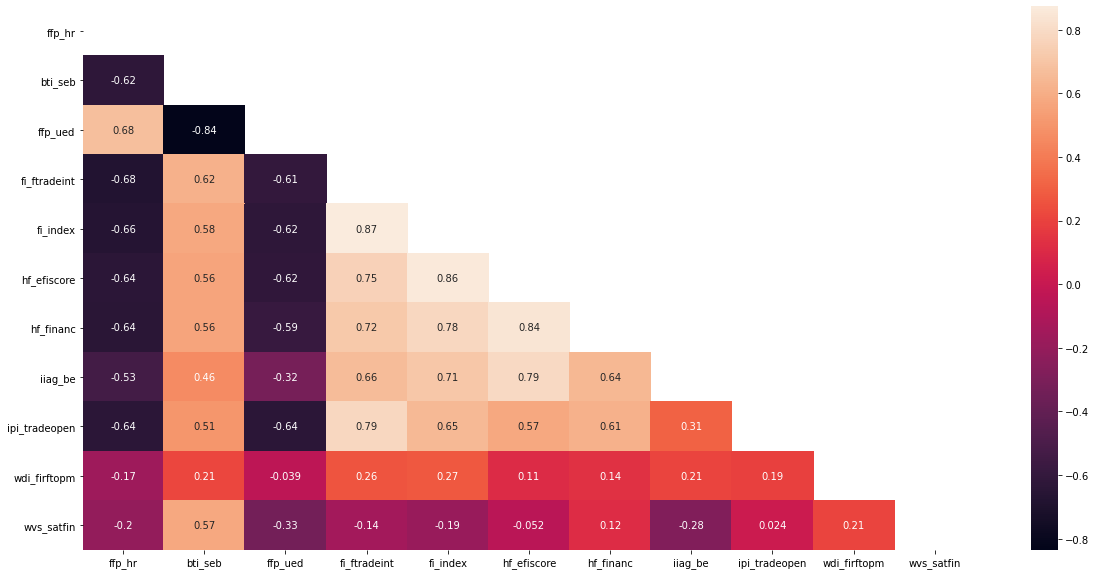

In [242]:
plt.figure(figsize=(20,10))
matrix = np.triu(private_economy.corr())
sns.heatmap(private_economy.corr(), annot=True, mask=matrix)

Nothing really strong